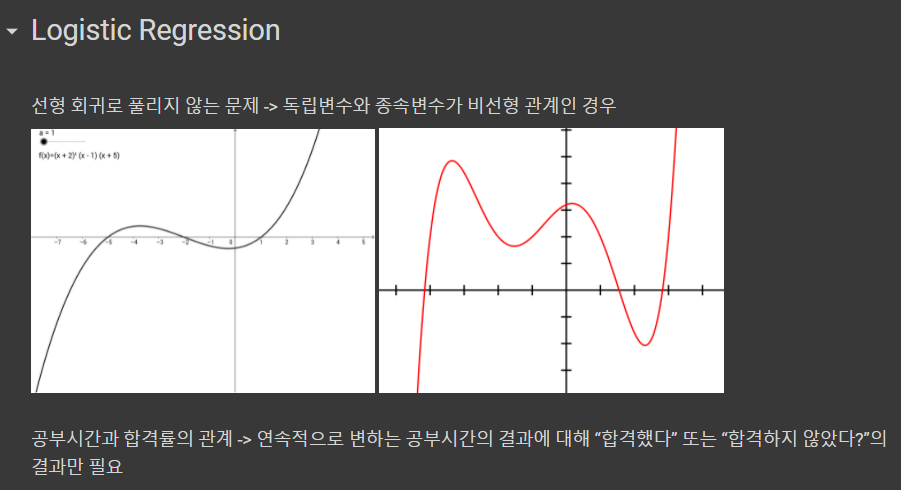

#### 로지스틱 함수 (sigmoid 함수)

## 아직 신경층을 잘 못 쌓겠음
어떻게 신경망을 쌓아야할지 몰라서, 항상 한층만 쌓았음.

그래서 input 의 dimension 이 많은 X_data 일 수록 학습하는데 어려움을 겪음( 말그대로 학습이 어려움.loss 는 높게, accuary 는 낮게 나옴 )

그래서 sklearn 에서 제공해주는 여러함수중 logistic regression 을 사용해보고 어떤 면에서 기존 tensorflow.keras 쓰는것과 비슷한지, 찾아보려고 했음.




In [ ]:
## 07_05 참조
## Diabetes linear regression
## https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# data 를 코렙에 옮긴 csv 파일에서 df 로 불러오기
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# df 의 정보 확인 ( null 이 있는지 없는지 )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# 각 featuer 들의 min, max , mean 등을 볼 수 있음
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.shape

(768, 9)

In [3]:
# df 를 np.asarray 형식으로 만들어줌
df_dataset = np.asarray(df, dtype='float64')

In [5]:
X = df_dataset[:, :-1]
y = df_dataset[:, -1]
print('X.shape : ' ,X.shape)
print('y.shape', y.shape)

X_train.shape :  (768, 8)
y_train.shape (768,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=0)
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (576, 8)
y_train.shape :  (576,)
X_test.shape :  (192, 8)
y_test.shape :  (192,)


In [ ]:
# 기존 모델

# model = keras.Sequential(keras.layers.Dense(units=1, activation = 'sigmoid',input_shape=(1, )))
# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.02), metrics=['accuracy'])
# hist = model.fit(X, y, epochs=1000)

In [27]:
# sklearn 모델
model = LogisticRegression(C=0.1, max_iter=1000000).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7604166666666666, 0.796875)